<a href="https://colab.research.google.com/github/tj-mas04/SpeechEmotion/blob/main/SpeechEmotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
import kagglehub

path = kagglehub.dataset_download("ejlok1/toronto-emotional-speech-set-tess")

print("Path to dataset files:", path)

100%|██████████| 428M/428M [00:02<00:00, 165MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1


In [5]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [6]:
len(paths)

2800

In [7]:
paths[:5]

['/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_happy/YAF_puff_happy.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_happy/YAF_sub_happy.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_happy/YAF_loaf_happy.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_happy/YAF_keep_happy.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_happy/YAF_thumb_happy.wav']

In [8]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/root/.cache/kagglehub/datasets/ejlok1/toronto...,happy
1,/root/.cache/kagglehub/datasets/ejlok1/toronto...,happy
2,/root/.cache/kagglehub/datasets/ejlok1/toronto...,happy
3,/root/.cache/kagglehub/datasets/ejlok1/toronto...,happy
4,/root/.cache/kagglehub/datasets/ejlok1/toronto...,happy


In [9]:
df['label'].value_counts()

,count
label,
happy,400
ps,400
fear,400
sad,400
neutral,400
angry,400
disgust,400


<Axes: xlabel='label', ylabel='count'>

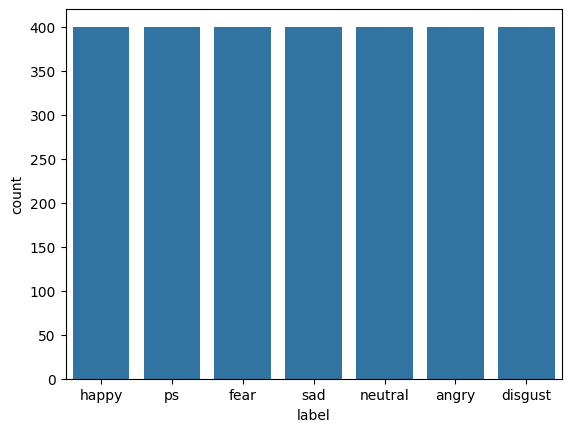

In [10]:
sns.countplot(data=df, x='label')

In [11]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

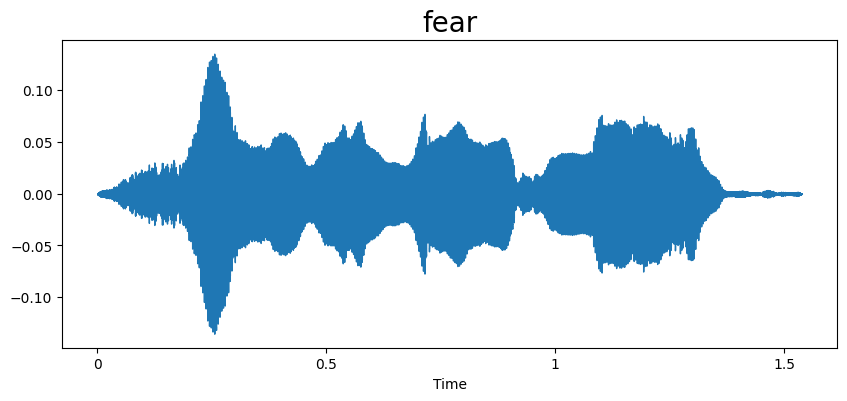

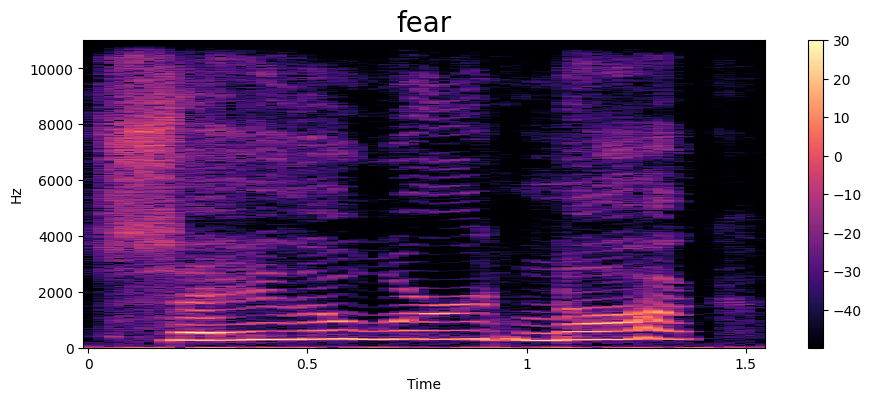

In [12]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

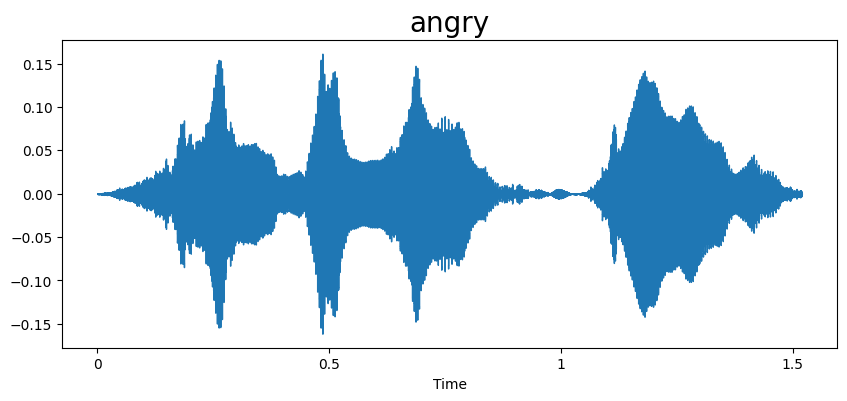

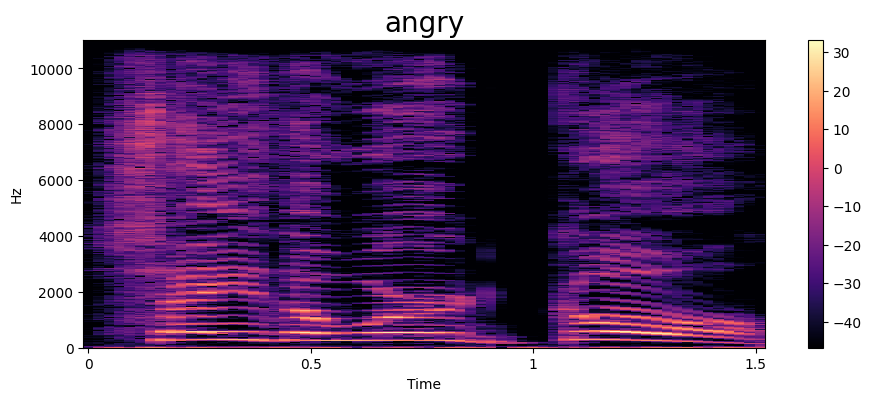

In [13]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

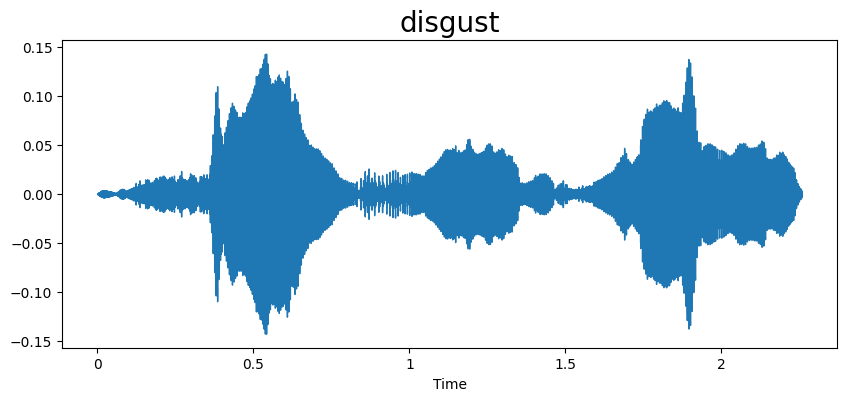

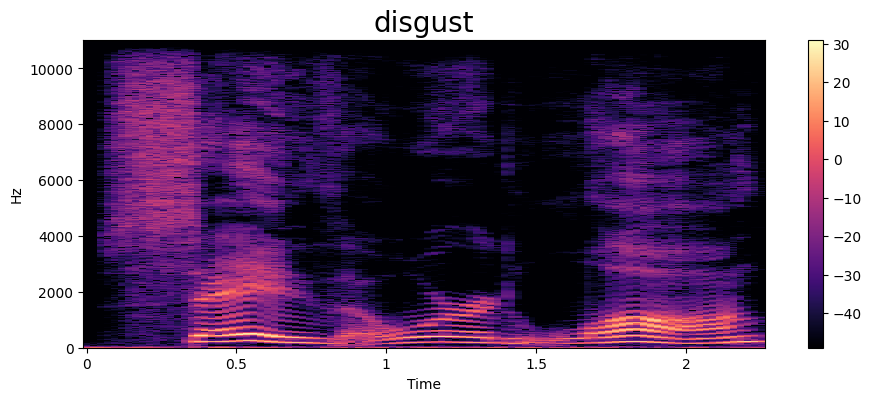

In [14]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

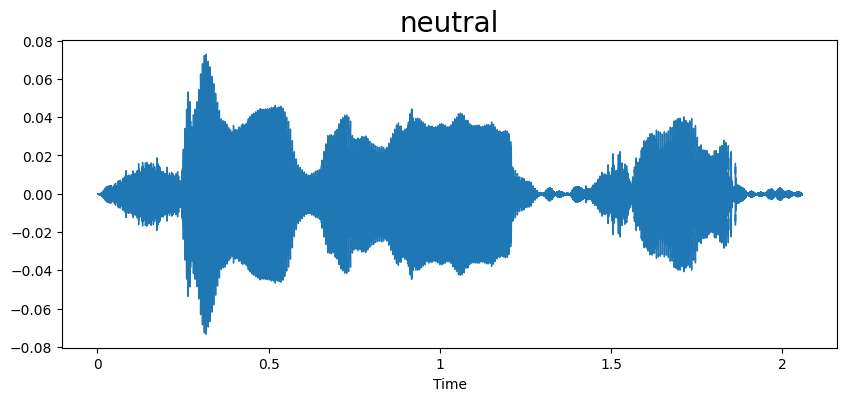

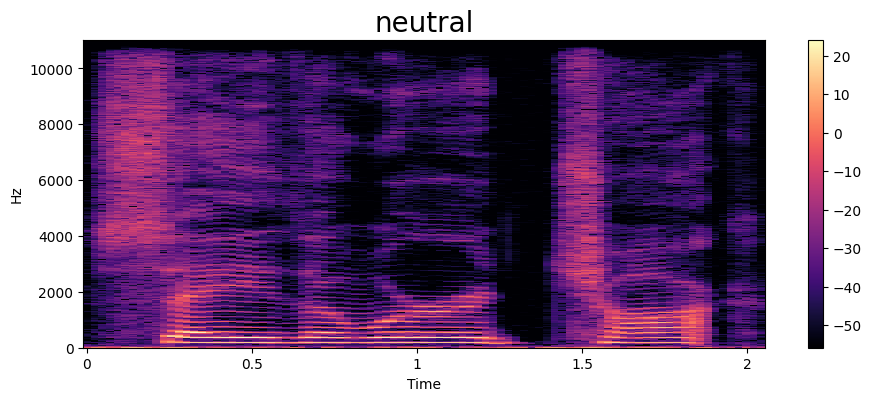

In [15]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

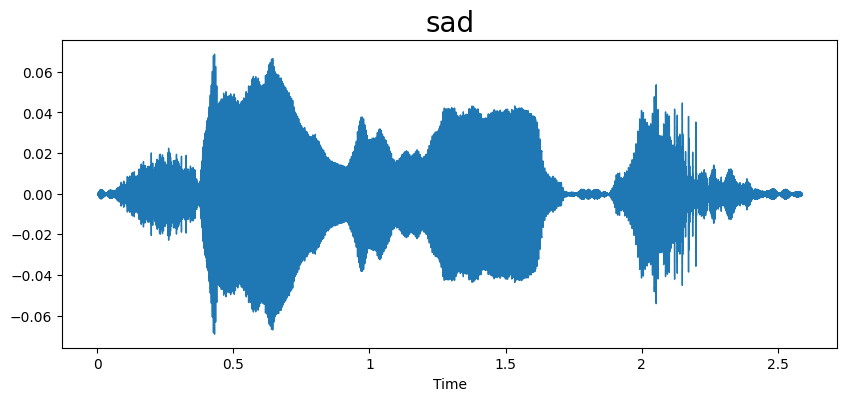

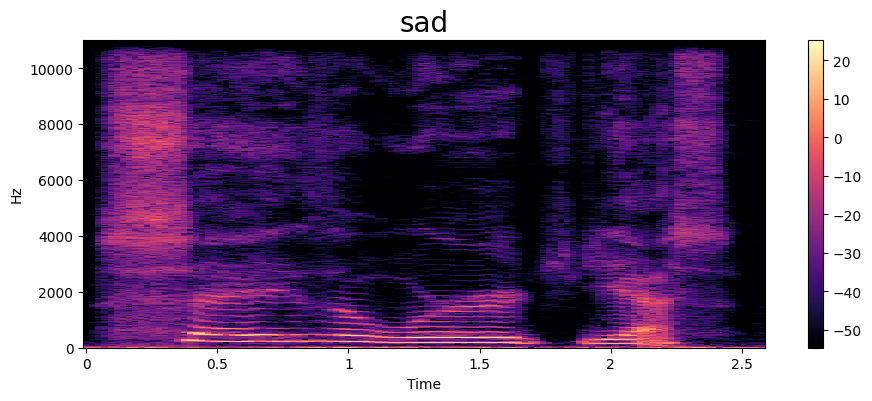

In [16]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

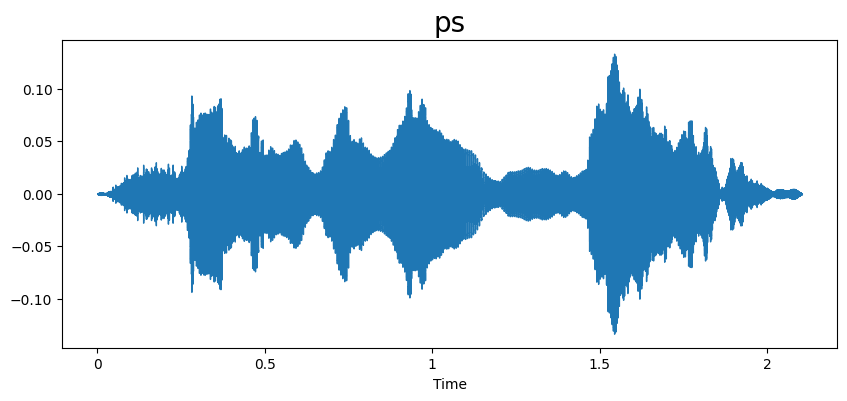

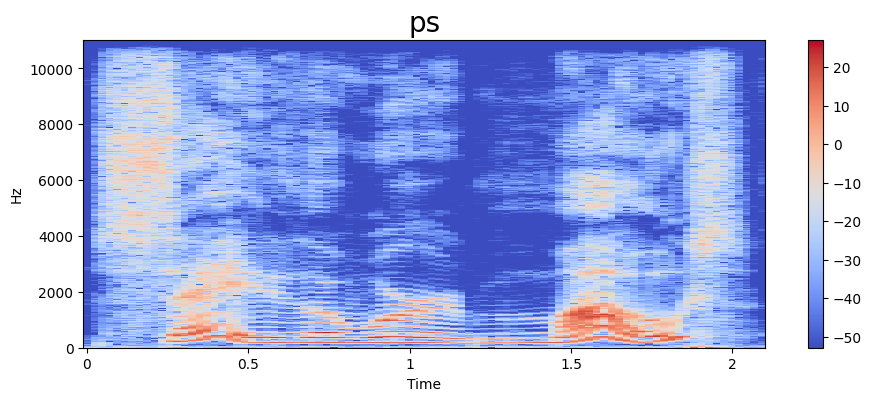

In [17]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

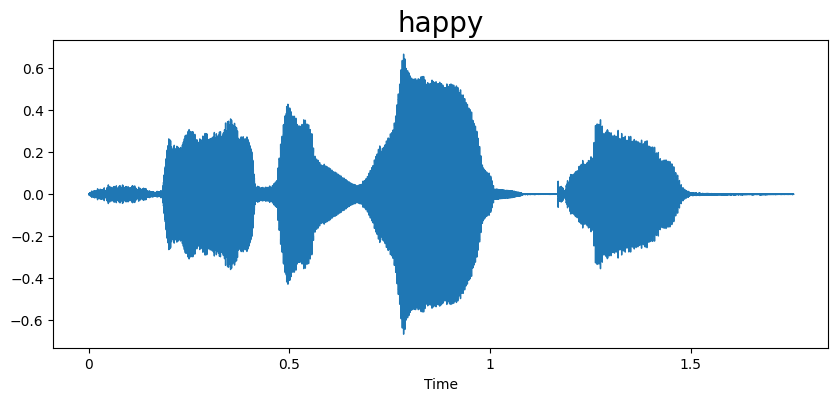

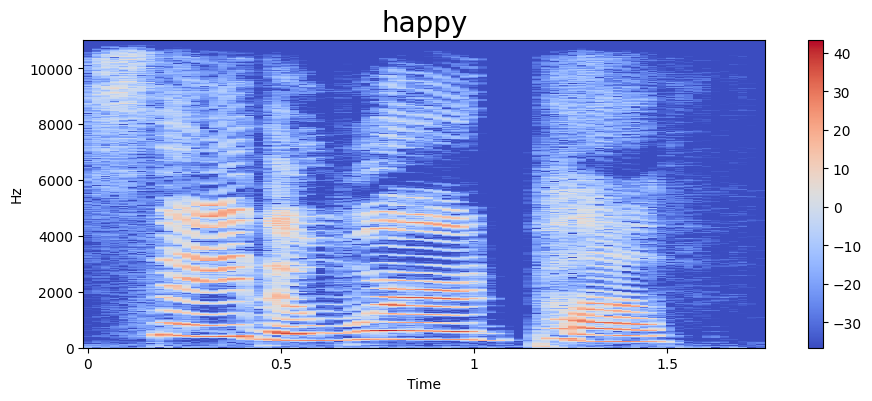

In [18]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [19]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [20]:
extract_mfcc(df['speech'][0])

array([-3.1881299e+02,  5.1352291e+01, -1.9950617e+01,  1.0105888e+01,
       -1.7735434e+01,  1.5924478e+00, -5.5975204e+00, -2.1547857e+01,
        2.2039597e+00, -4.0119705e-01, -5.8208032e+00,  6.4010353e+00,
       -1.6584375e+01,  9.5699816e+00, -5.4630780e+00, -5.2241020e+00,
       -3.7380774e+00, -5.3012495e+00, -9.6283970e+00, -1.0293772e+00,
       -5.0757027e+00,  4.2309523e+00,  1.0192996e+01,  1.3654331e+01,
        1.1149444e+01,  1.1126148e+01, -2.1266204e-01,  5.2574735e+00,
        1.0856706e+00,  9.7520285e+00,  4.4953790e+00,  8.0521029e-01,
       -9.6979922e-01,  4.0344009e+00,  3.0403633e+00,  8.4492695e-01,
       -8.2257233e+00, -5.9010496e+00, -2.1704496e-01,  2.7290795e+00],
      dtype=float32)

In [21]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [22]:
X_mfcc

,speech
0,"[-318.813, 51.35229, -19.950617, 10.105888, -1..."
1,"[-328.65506, 46.55414, -20.466187, 6.601825, -..."
2,"[-337.0556, 44.846325, -17.352173, 16.08206, -..."
3,"[-352.5881, 27.351557, -11.7183, 40.08532, -11..."
4,"[-341.69806, 57.061867, -20.327246, 17.163763,..."
...,...
2795,"[-424.98172, 100.19008, -0.33041796, 36.058247..."
2796,"[-435.8804, 95.23087, 0.79366744, 20.53052, -3..."
2797,"[-445.00266, 108.02552, -0.47705567, 22.14867,..."
2798,"[-407.18704, 91.9363, -17.991373, 20.51366, -1..."


In [23]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [24]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [26]:
y = y.toarray()

In [27]:
y.shape

(2800, 7)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.3985 - loss: 1.5016 - val_accuracy: 0.0000e+00 - val_loss: 3.3058
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.8100 - loss: 0.5091 - val_accuracy: 0.0714 - val_loss: 2.7480
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - accuracy: 0.9389 - loss: 0.2272 - val_accuracy: 0.2518 - val_loss: 2.3145
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.9592 - loss: 0.1455 - val_accuracy: 0.2804 - val_loss: 2.1838
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - accuracy: 0.9535 - loss: 0.1550 - val_accuracy: 0.2482 - val_loss: 2.7465
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9657 - loss: 0.1020 - val_accuracy: 0.5571 - val_loss: 2.1060
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.9635 - loss: 0.1156 - val_accuracy: 0.4304 - val_loss: 2.7142
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.9605 - loss: 0.1164 - val_ac

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()